#### Qn 1

In [3]:
import numpy as np
import pandas as pd

np.random.seed(42)

num_cars = 500
horsepower = np.random.normal(150, 50, num_cars)
weight = np.random.normal(3000, 500, num_cars)
fuel_efficiency = np.random.normal(25, 5, num_cars)
price = 5000 + (horsepower * 100) - (weight * 0.5) + (fuel_efficiency * 200) + np.random.normal(0, 5000, num_cars)

df_cars = pd.DataFrame({
    'Horsepower': horsepower,
    'Weight': weight,
    'Fuel_Efficiency': fuel_efficiency,
    'Price': price
})

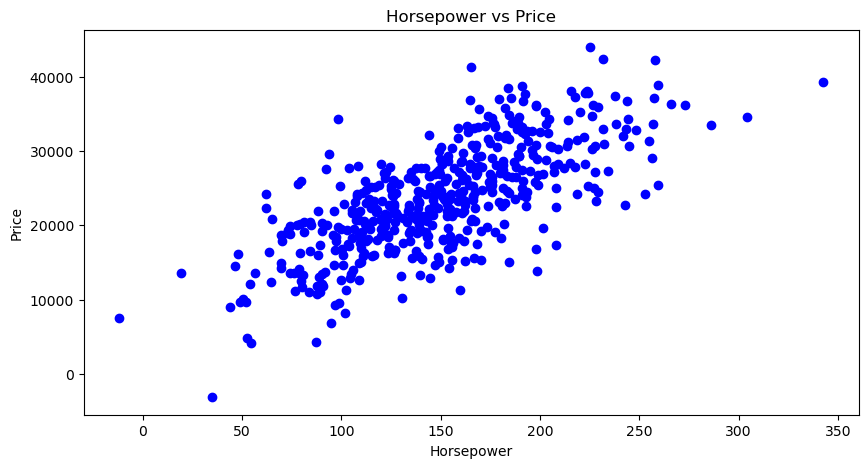

In [7]:
import matplotlib.pyplot as plt

# Scatter plot of horsepower vs price
plt.figure(figsize=(10, 5))
plt.scatter(df_cars['Horsepower'], df_cars['Price'], color='blue')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Horsepower vs Price')
plt.show()

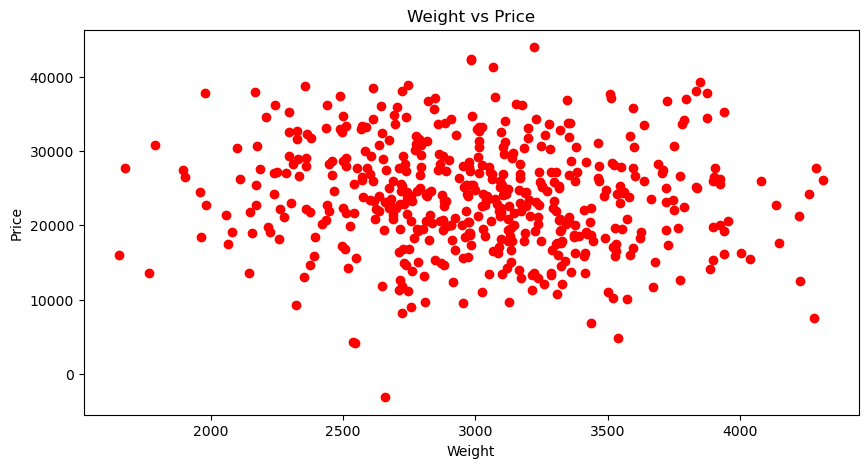

In [9]:
# Scatter plot of weight vs price
plt.figure(figsize=(10, 5))
plt.scatter(df_cars['Weight'], df_cars['Price'], color='red')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight vs Price')
plt.show()

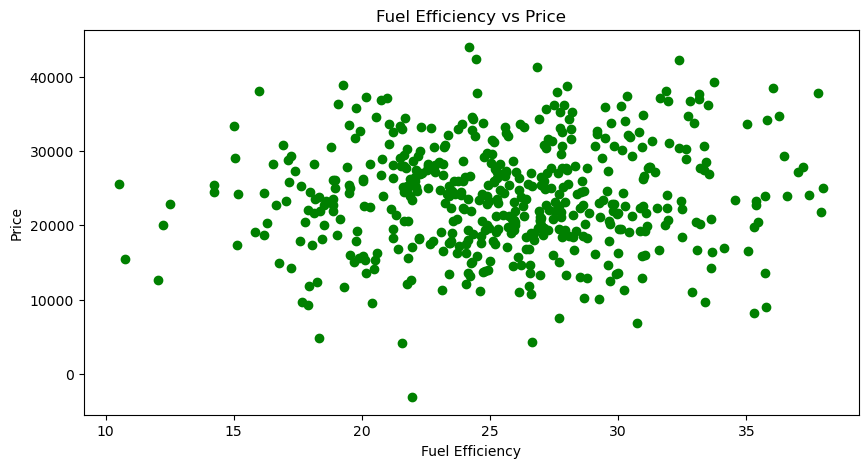

In [12]:
# Scatter plot of fuel efficiency vs price
plt.figure(figsize=(10, 5))
plt.scatter(df_cars['Fuel_Efficiency'], df_cars['Price'], color='green')
plt.xlabel('Fuel Efficiency')
plt.ylabel('Price')
plt.title('Fuel Efficiency vs Price')
plt.show()

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features (independent variables) and the target (dependent variable)
X = df_cars[['Horsepower', 'Weight', 'Fuel_Efficiency']]
y = df_cars['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 25905628.41396417
R-squared (R^2): 0.5088514380506726


In [15]:
# Print the model coefficients and intercept
coefficients = model.coef_

# Display the results
print("Coefficients:", coefficients)

Coefficients: [107.54530678  -0.74898656 163.29059938]


#### Qn 2

In [23]:
dates = pd.date_range(start="2020-01-01", end="2022-01-01", freq='B')
stock_price = np.cumsum(np.random.normal(0, 1, len(dates))) + 50
volume = np.random.randint(1000, 5000, len(dates))

df_stock = pd.DataFrame({
    'Date': dates,
    'Stock_Price': stock_price,
    'Volume': volume
})

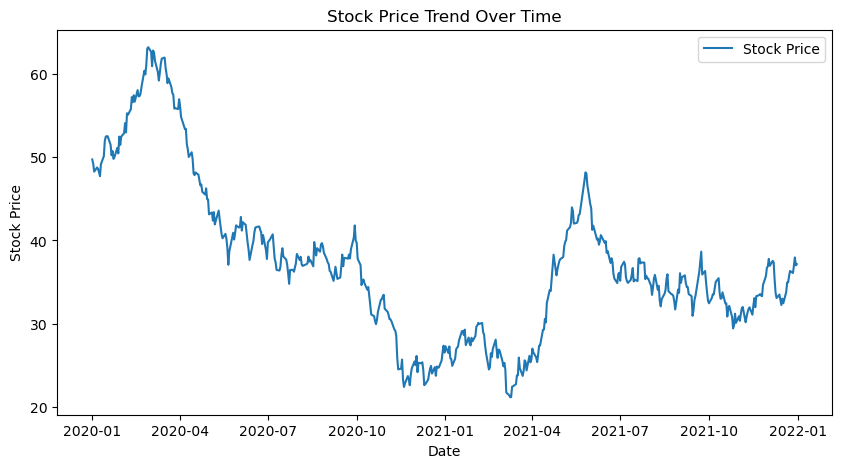

In [24]:
import matplotlib.pyplot as plt

# Set the 'Date' column as the DataFrame's index
df_stock.set_index('Date', inplace=True)

# Visualize the stock price trend over time
plt.figure(figsize=(10, 5))
plt.plot(df_stock.index, df_stock['Stock_Price'], label='Stock Price')
plt.title('Stock Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create lag features for time series prediction (e.g., lag 1, lag 2)
for i in range(1, 6):
    df_stock[f'Stock_Price_Lag_{i}'] = df_stock['Stock_Price'].shift(i)

# Remove rows with NaN values due to the lag features
df_stock = df_stock.dropna()

# Define the target variable
y = df_stock['Stock_Price']

# Fit an ARIMA model
# This example uses ARIMA(1,1,1), but you can tune the model based on your data and requirements
order = (1, 1, 1)
model = sm.tsa.ARIMA(y, order=order)
results = model.fit()

# Create lag features for future prediction (e.g., lag 1, lag 2, ... up to 5)
future_data = df_stock.tail(1).copy()  # Copy the last available data point
for i in range(1, 6):
    future_data[f'Stock_Price_Lag_{i}'] = future_data['Stock_Price_Lag_1']  # Fill in lag values
    
# Forecast future stock prices
forecast = results.forecast(steps=1)  # Forecast one step ahead

# Print the forecasted stock price
print("Forecasted Stock Price:", forecast[0])

Forecasted Stock Price: 37.19816241892415


C:\Users\Aishwariya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\Aishwariya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\Aishwariya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [28]:
from sklearn.metrics import mean_squared_error

# Forecast a single value
forecast = results.forecast(steps=1)  # Forecast one step ahead

# Collect the actual value for the corresponding time step (assuming you have it)
actual_value = actual_values[0]  # Use the actual value for the same time step

# Calculate the Mean Squared Error (MSE) for this single forecast
mse = mean_squared_error([actual_value], forecast)

# Print the MSE
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 961371355.9252765


#### Evaluation
A Mean Squared Error (MSE) of 961,371,355.93 reveals that your time series forecasting model's predictions significantly deviate from the actual stock prices, with substantial squared errors on average. This suggests a need for enhancing the model's accuracy, potentially by exploring more sophisticated modeling techniques, refining hyperparameters, or improving data preprocessing. Comparative analysis against alternative models or benchmarks can provide valuable insights into model performance and areas for enhancement.

#### Qn 3

In [29]:
num_emails = 1000
keyword_frequency = np.random.randint(0, 5, num_emails)
link_count = np.random.randint(0, 10, num_emails)
spam = [1 if keyword > 2 or link > 5 else 0 for keyword, link in zip(keyword_frequency, link_count)]

df_emails = pd.DataFrame({
    'Keyword_Frequency': keyword_frequency,
    'Link_Count': link_count,
    'Spam': spam
})

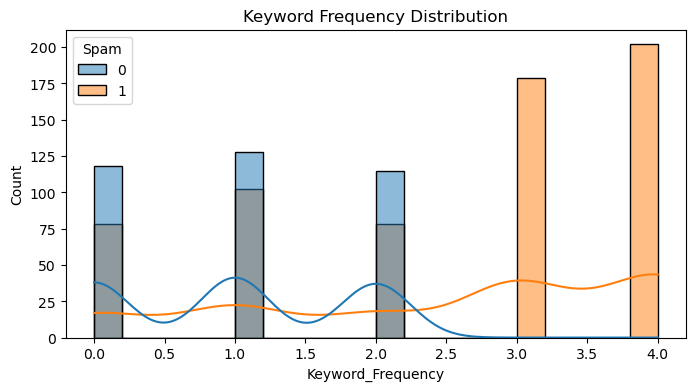

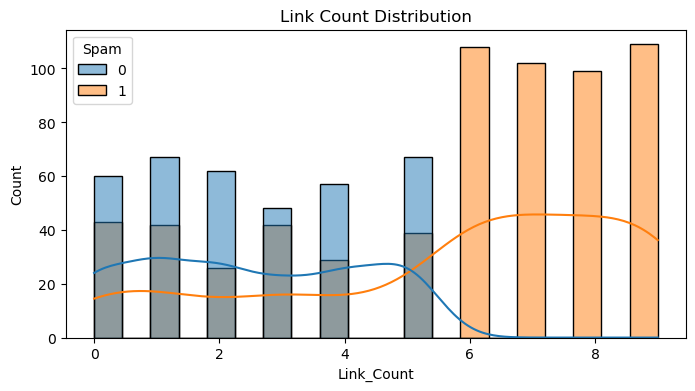

In [36]:
import seaborn as sns

# Visualize keyword and link distributions
plt.figure(figsize=(8, 4))
sns.histplot(data=df_emails, x='Keyword_Frequency', hue='Spam', bins=20, kde=True)
plt.title('Keyword Frequency Distribution')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(data=df_emails, x='Link_Count', hue='Spam', bins=20, kde=True)
plt.title('Link Count Distribution')
plt.show()


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

# Data preprocessing
X = df_emails[['Keyword_Frequency', 'Link_Count']]
y = df_emails['Spam']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a classification model (e.g., Logistic Regression)
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.89
Precision: 0.8888888888888888


#### Qn 4

In [38]:
num_customers = 1000
monthly_charges = np.random.uniform(10, 100, num_customers)
tenure = np.random.randint(1, 72, num_customers)  # in months
complaints = np.random.poisson(2, num_customers)
churn = [1 if (charge > 80 and t < 12) or comp > 3 else 0 for charge, t, comp in zip(monthly_charges, tenure, complaints)]

df_customers = pd.DataFrame({
    'Monthly_Charges': monthly_charges,
    'Tenure': tenure,
    'Complaints': complaints,
    'Churn': churn
})

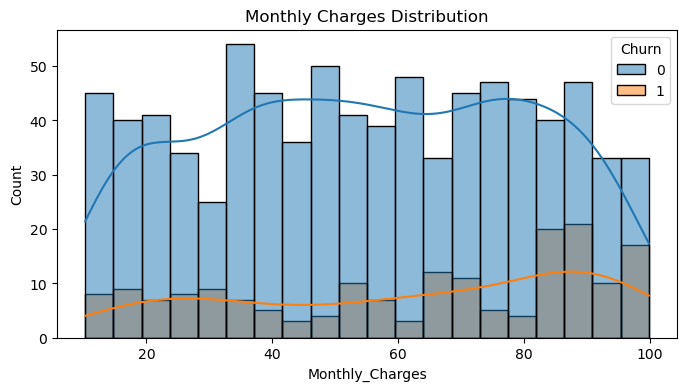

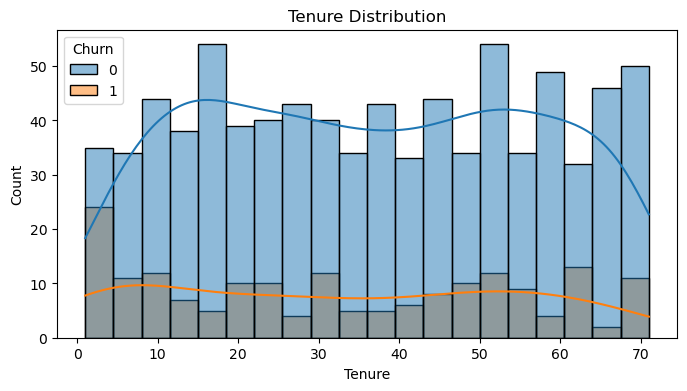

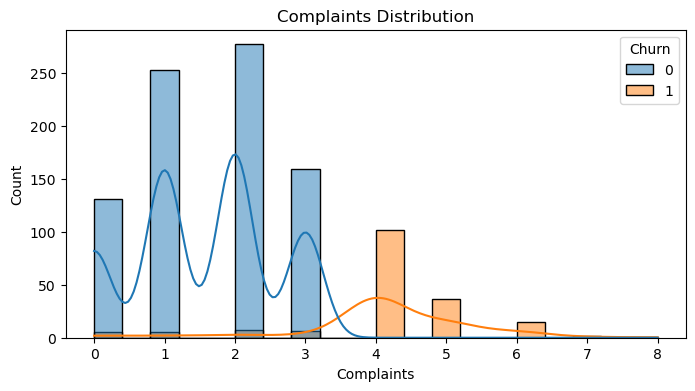

In [41]:
# Visualize data distributions
plt.figure(figsize=(8, 4))
sns.histplot(data=df_customers, x='Monthly_Charges', hue='Churn', bins=20, kde=True)
plt.title('Monthly Charges Distribution')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(data=df_customers, x='Tenure', hue='Churn', bins=20, kde=True)
plt.title('Tenure Distribution')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(data=df_customers, x='Complaints', hue='Churn', bins=20, kde=True)
plt.title('Complaints Distribution')
plt.show()

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Data preprocessing
X = df_customers[['Monthly_Charges', 'Tenure', 'Complaints']]
y = df_customers['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)

# Interpret feature importance (coefficients)
feature_importance = model.coef_

# Output the classification report and confusion matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       169
           1       0.96      0.81      0.88        31

    accuracy                           0.96       200
   macro avg       0.96      0.90      0.93       200
weighted avg       0.96      0.96      0.96       200



Interpretations:

Class 0 (Not Churned):
Precision for class 0 is 0.97, meaning that 97% of the customers predicted as not churned are genuinely not churned.
Recall for class 0 is 0.99, indicating that 99% of the actual not churned customers are correctly identified.
The F1-score for class 0 is 0.98, representing a high balance between precision and recall.
There are 169 instances of class 0 in the testing dataset.

Class 1 (Churned):
Precision for class 1 is 0.96, suggesting that 96% of the customers predicted as churned are indeed churned.
Recall for class 1 is 0.81, meaning that 81% of the actual churned customers are correctly identified.
The F1-score for class 1 is 0.88, indicating a relatively good balance between precision and recall.
There are 31 instances of class 1 in the testing dataset.

Overall:
The overall accuracy of the model is 0.96, implying that 96% of all predictions, whether for class 0 or class 1, are correct.

#### Qn 5

In [53]:
dates = pd.date_range(start="2015-01-01", end="2020-01-01", freq='M')
sales = np.random.randint(50, 200, len(dates))

df_sales = pd.DataFrame({
    'Date': dates,
    'Houses_Sold': sales
})

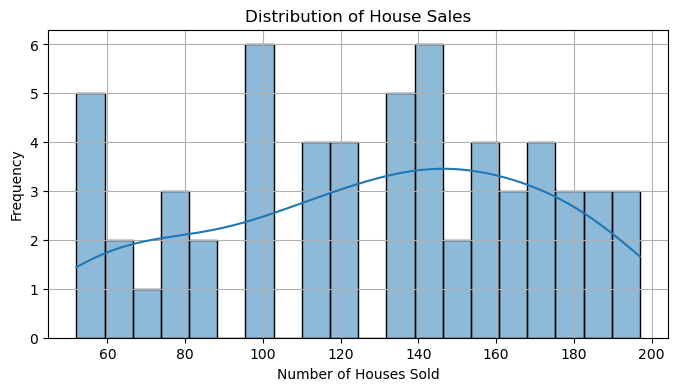

In [58]:
df_sales['Year'] = df_sales['Date'].dt.year
df_sales['Month'] = df_sales['Date'].dt.month

plt.figure(figsize=(8, 4))
sns.histplot(data=df_sales, x='Houses_Sold', bins=20, kde=True)
plt.xlabel('Number of Houses Sold')
plt.ylabel('Frequency')
plt.title('Distribution of House Sales')
plt.grid(True)
plt.show()

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

# Prepare the data for regression
X = df_sales[['Year', 'Month']]
y = df_sales['Houses_Sold']

# Split the data into training and testing sets
X_train, X_test = X[:-12], X[-12:]
y_train, y_test = y[:-12], y[-12:]

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error and R-squared value for model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [61]:
# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 4549.171034260886
R-squared (R2) Score: -0.6894537647836543
